# HW03: due October 18th 

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [11]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [1]:
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


In [12]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Summary Statistics

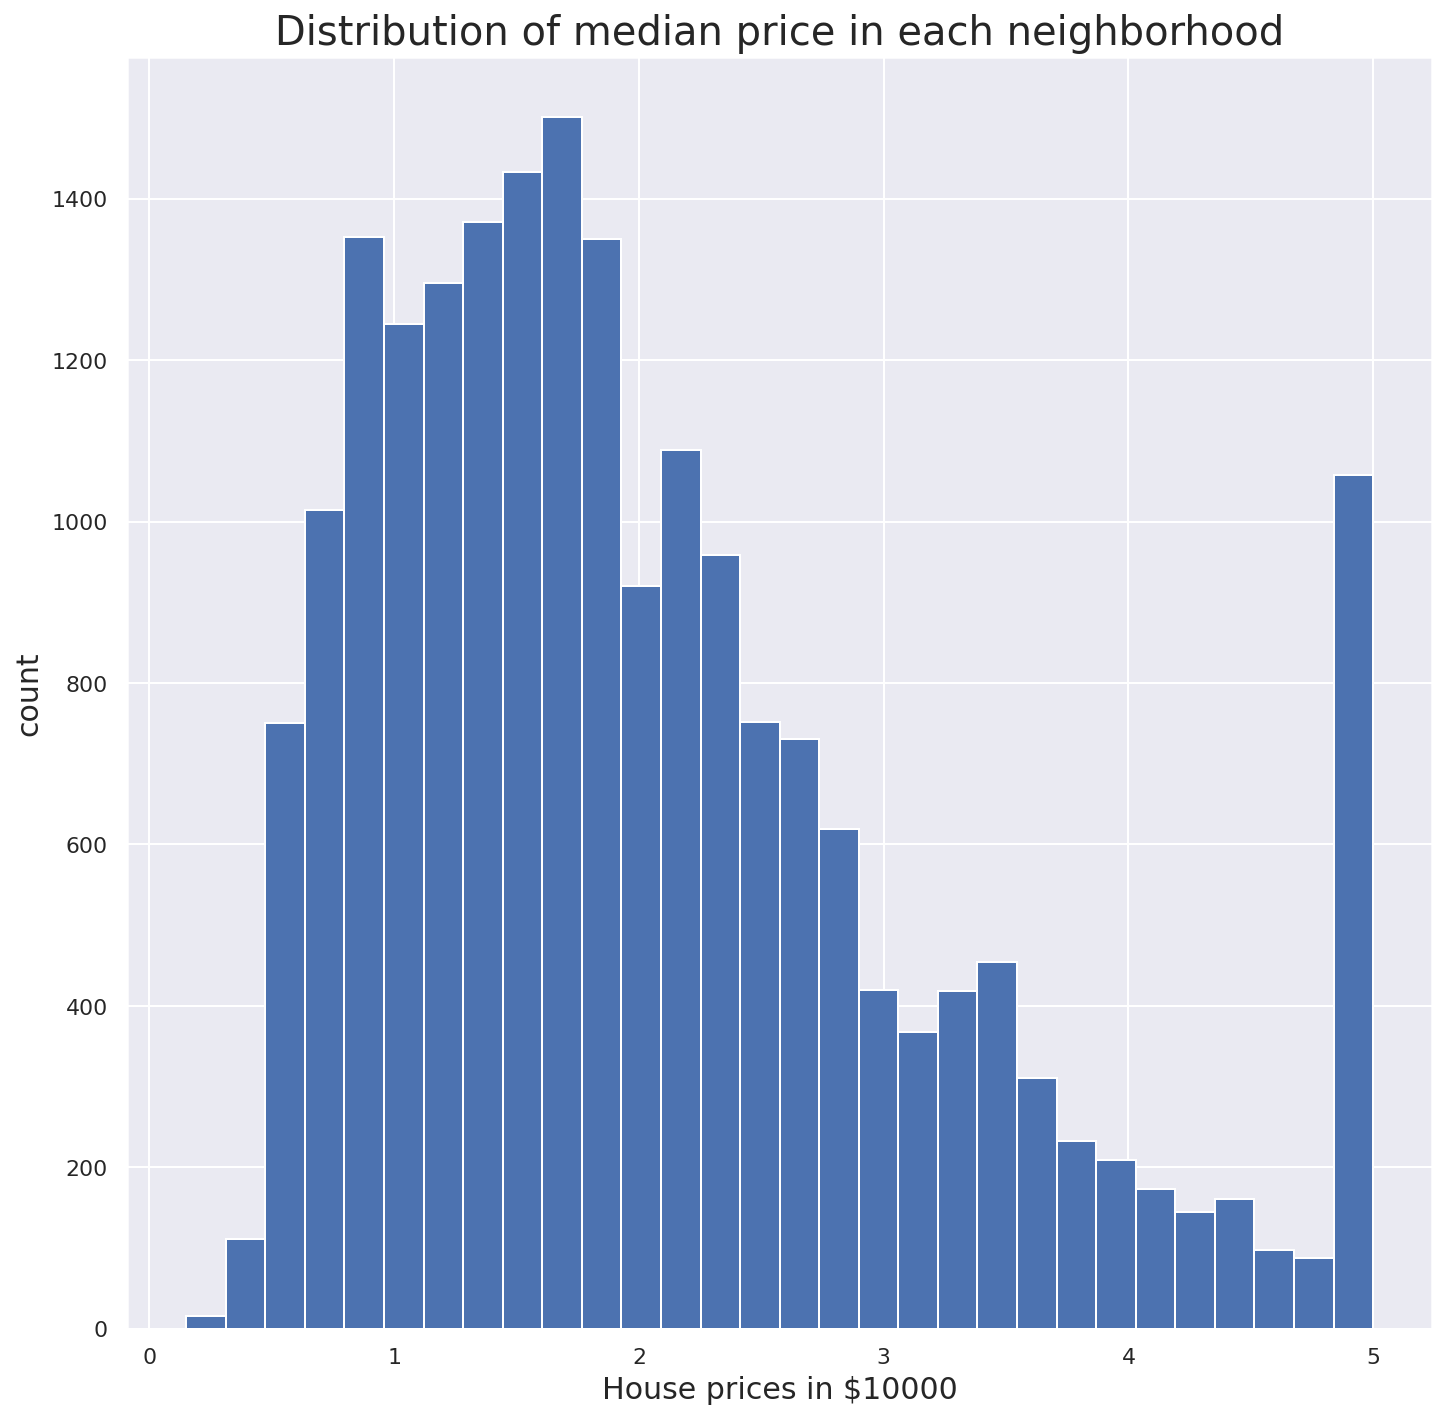

In [21]:
# make histograms of labels
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $10000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

Text(0.5, 1.0, 'Distributions of all predictors')

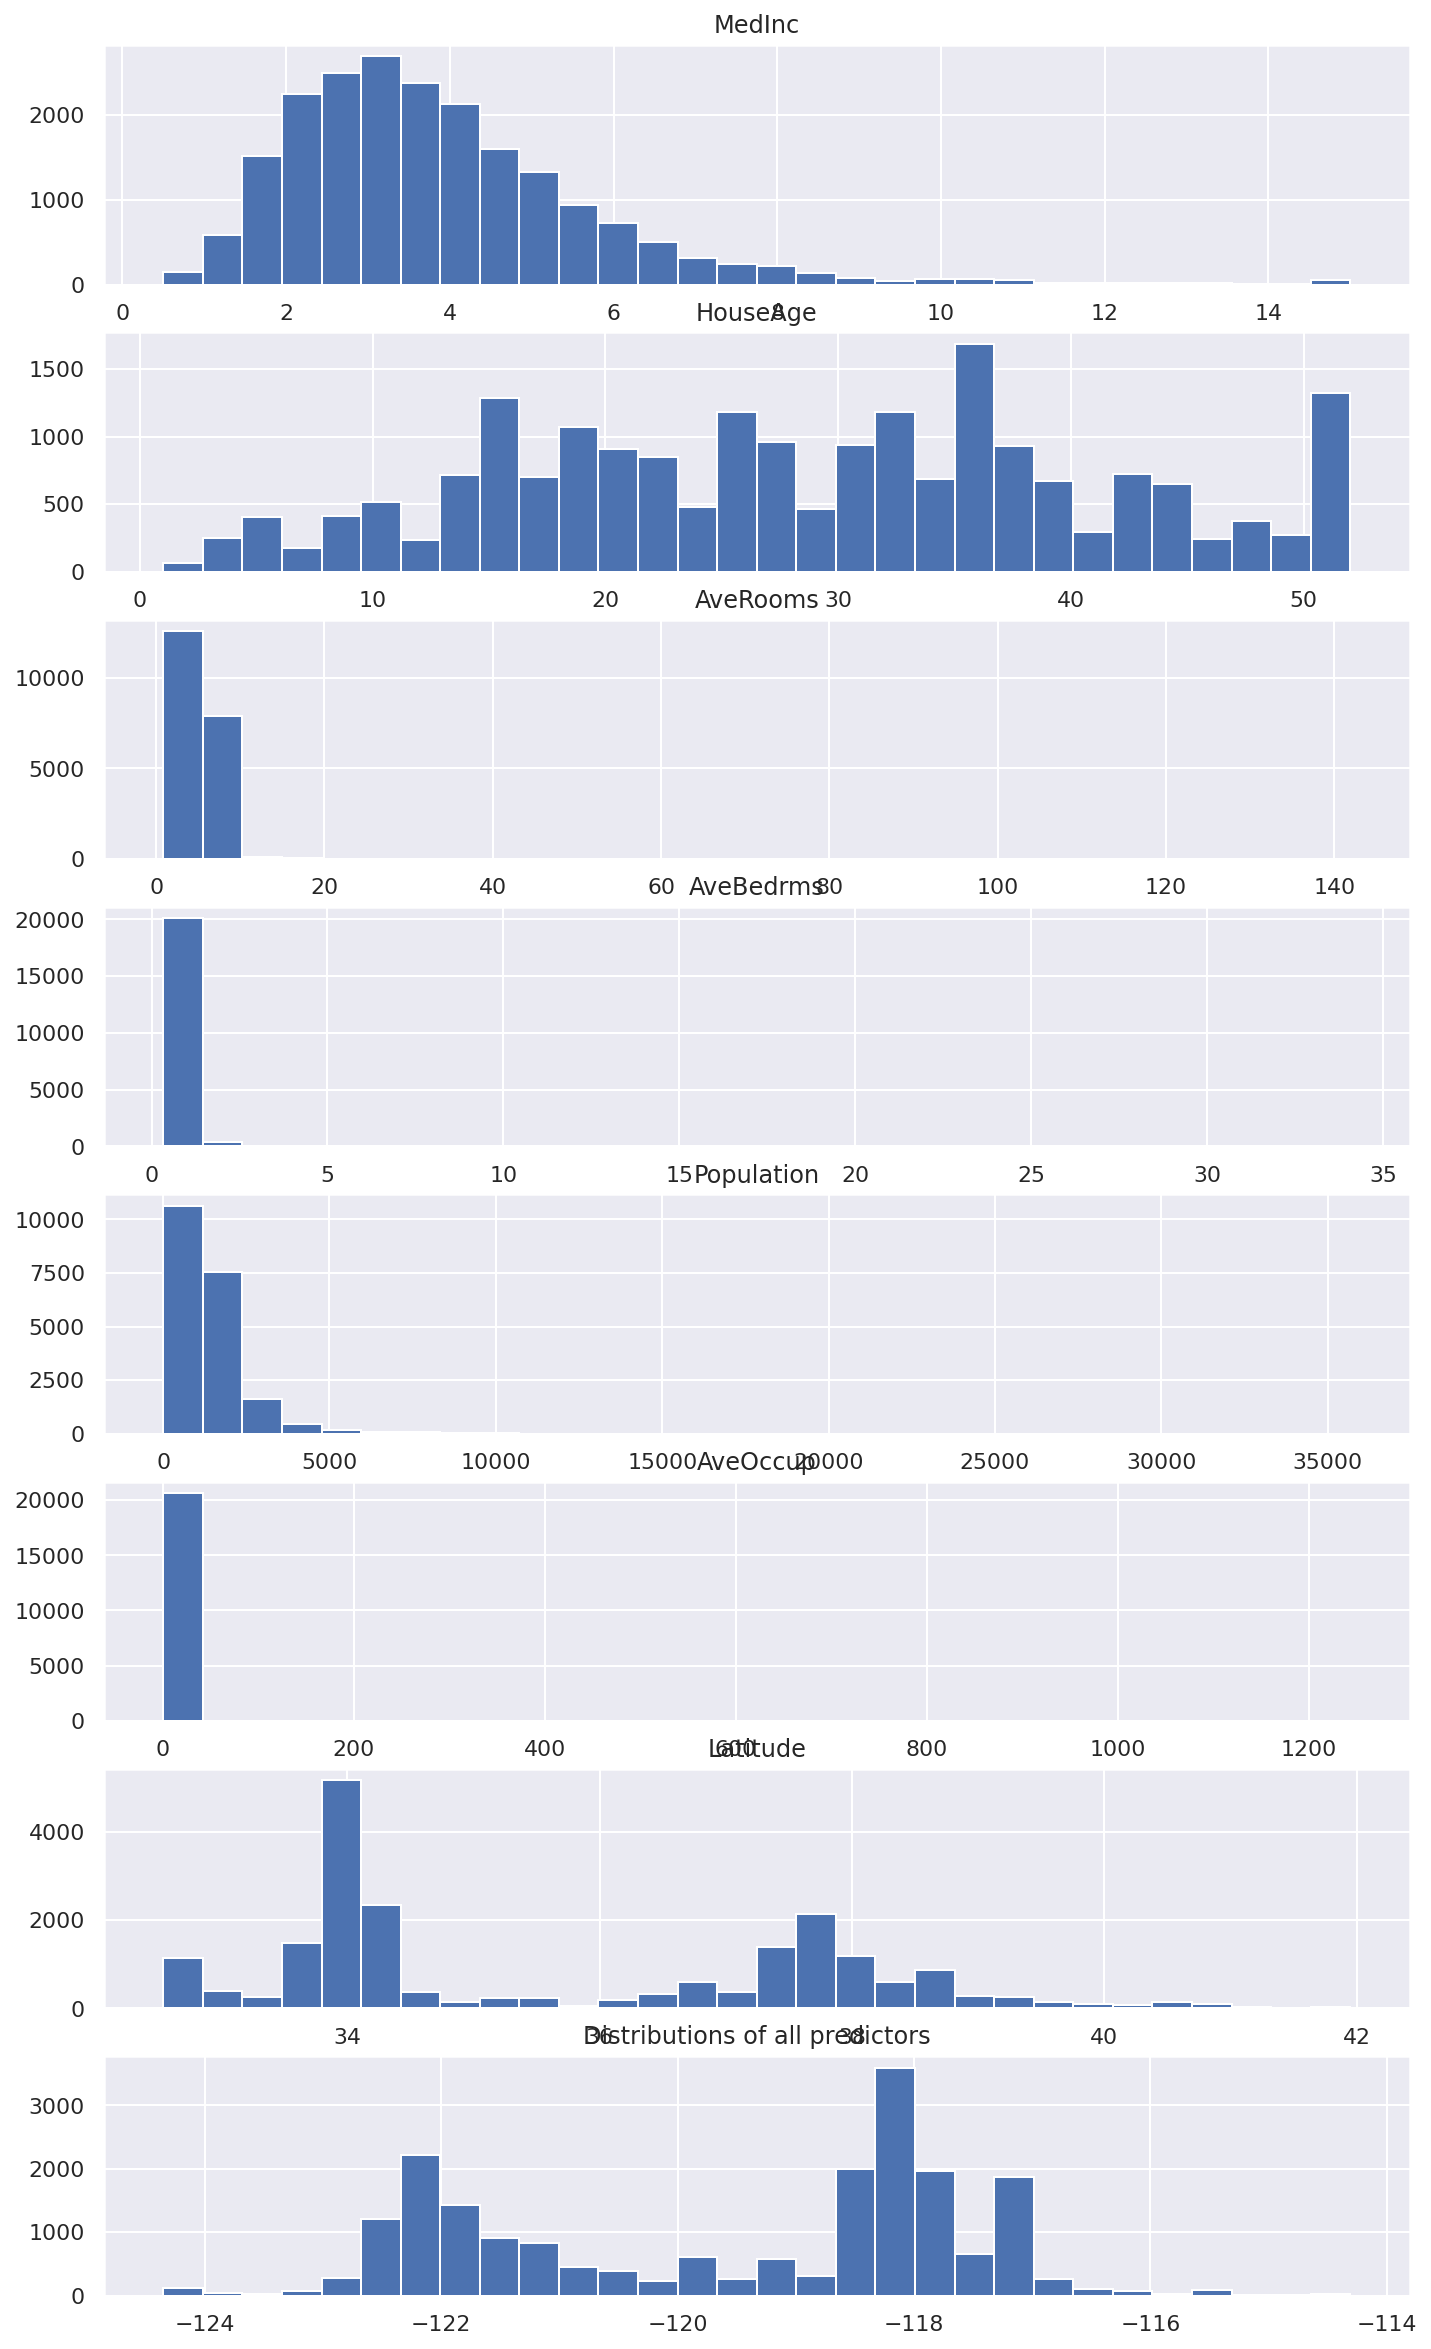

In [25]:
# make histograms of all predictors
sns.set(rc={'figure.figsize':(11.7,20.7)})
fig, axes = plt.subplots(X_full.shape[1])
for i, ax in enumerate(axes):
  ax.hist(X_full[:, i], bins=30)
  ax.set_title(X_df.columns[i])
plt.title('Distributions of all predictors')

Text(0.5, 1.0, 'Distributions of all predictors')

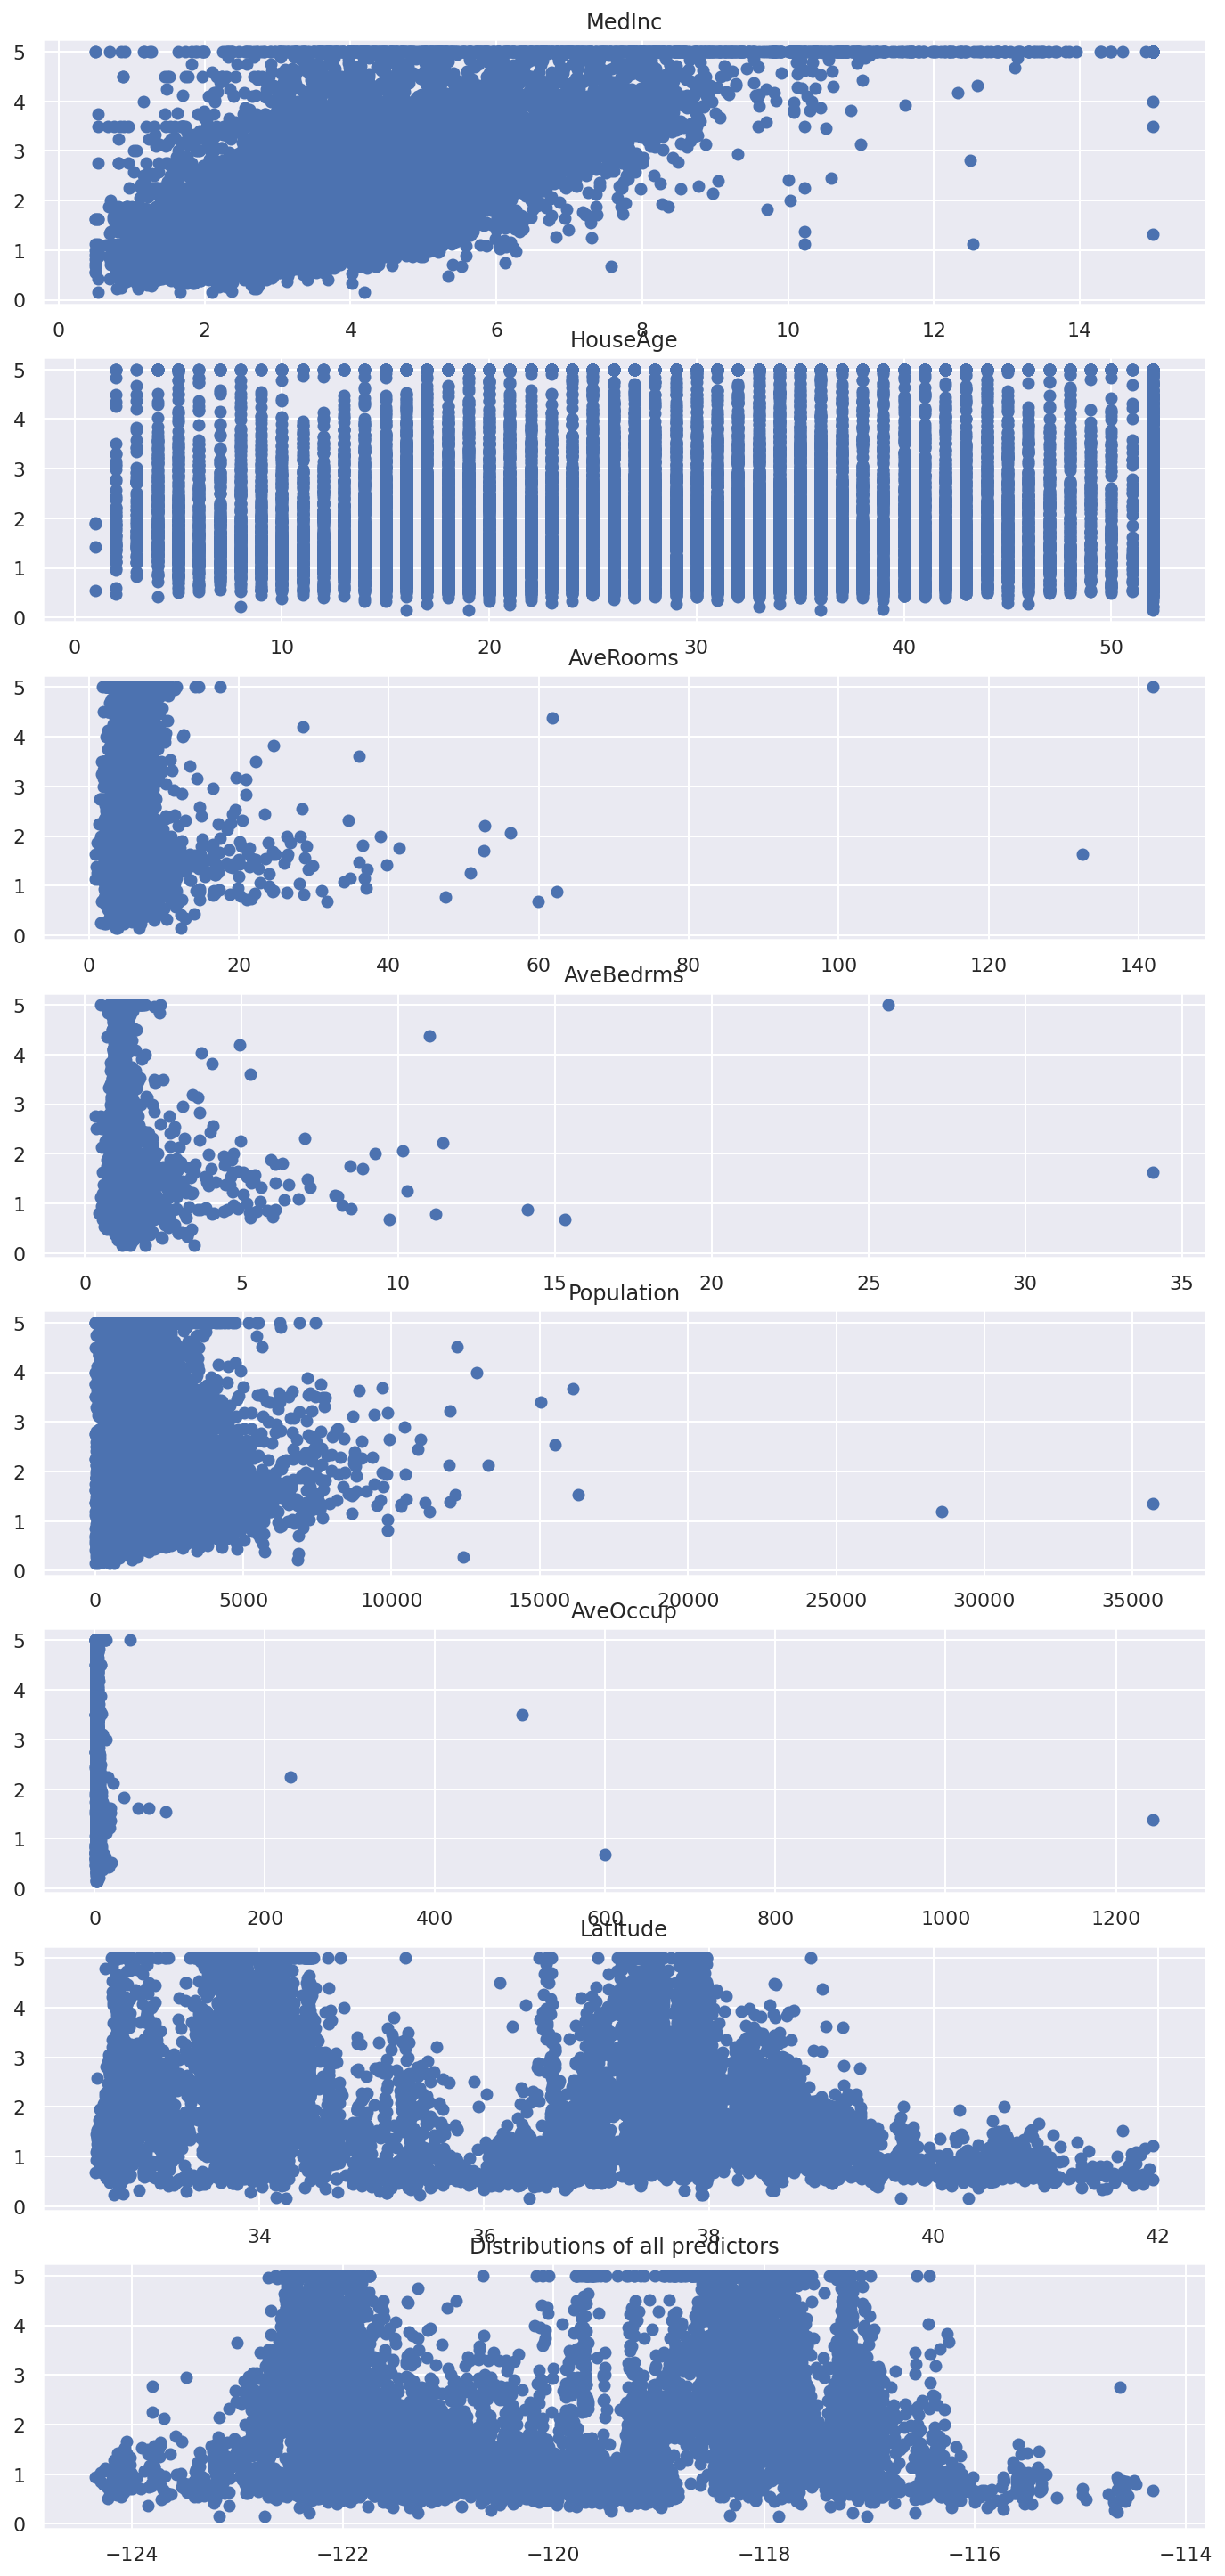

In [27]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
sns.set(rc={'figure.figsize':(11.7,25.7)})
fig, axes = plt.subplots(X_full.shape[1])
for i, ax in enumerate(axes):
  ax.scatter(X_full[:, i], y_full)
  ax.set_title(X_df.columns[i])
plt.title('Distributions of all predictors')

# Train/Test Split

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
#TODO
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (16512, 8) (16512,)
test data (4128, 8) (4128,)


# Pre-Processing

In [51]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
#TODO
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
#TODO
scaler = PolynomialFeatures().fit(X_train)
X_train_poly = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_poly = scaler.transform(X_test)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [33]:
!pip install fracridge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.3 MB/s 


In [34]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#
frcv = FracRidgeRegressorCV()
frcv.fit(X_train, y_train)
y_train_pred = frcv.predict(X_train)
y_test_pred = frcv.predict(X_test)
print(f'Train MSE Score: {mean_squared_error(y_train_pred, y_train)}')
r2 = r2_score(y_train_pred, y_train)
print(f'Train R-Squared Score: {r2}')
print(f'Test MSE Score: {mean_squared_error(y_test_pred, y_test)}')
r2 = r2_score(y_test_pred, y_test)
print(f'Test R-Squared Score: {r2}')

Train MSE Score: 0.6056822816758103
Train R-Squared Score: 0.15122184460844212
Test MSE Score: 0.6016264508240176
Test R-Squared Score: 0.20824641133788202


In [70]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
frcv.fit(X_train_scaled, y_train)
y_train_pred = frcv.predict(X_train_scaled)
y_test_pred = frcv.predict(X_test_scaled)
print(f'Train MSE Score: {mean_squared_error(y_train_pred, y_train)}')
r2 = r2_score(y_train_pred, y_train)
print(f'Train R-Squared Score: {r2}')
print(f'Test MSE Score: {mean_squared_error(y_test_pred, y_test)}')
r2 = r2_score(y_test_pred, y_test)
print(f'Test R-Squared Score: {r2}')

Train MSE Score: 4.838648136547171
Train R-Squared Score: -4.952576523802993
Test MSE Score: 4.7540617112024925
Test R-Squared Score: -4.57044103013402


In [69]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
frcv.fit(X_train_poly, y_train)
y_train_pred = frcv.predict(X_train_poly)
y_test_pred = frcv.predict(X_test_poly)
print(f'Train MSE Score: {mean_squared_error(y_train_pred, y_train)}')
r2 = r2_score(y_train_pred, y_train)
print(f'Train R-Squared Score: {r2}')
print(f'Test MSE Score: {mean_squared_error(y_test_pred, y_test)}')
r2 = r2_score(y_test_pred, y_test)
print(f'Test R-Squared Score: {r2}')

Train MSE Score: 0.44380562808259577
Train R-Squared Score: 0.5039919745963406
Test MSE Score: 0.44993413256668296
Test R-Squared Score: 0.5166166322621433


In [59]:
from seaborn import regplot

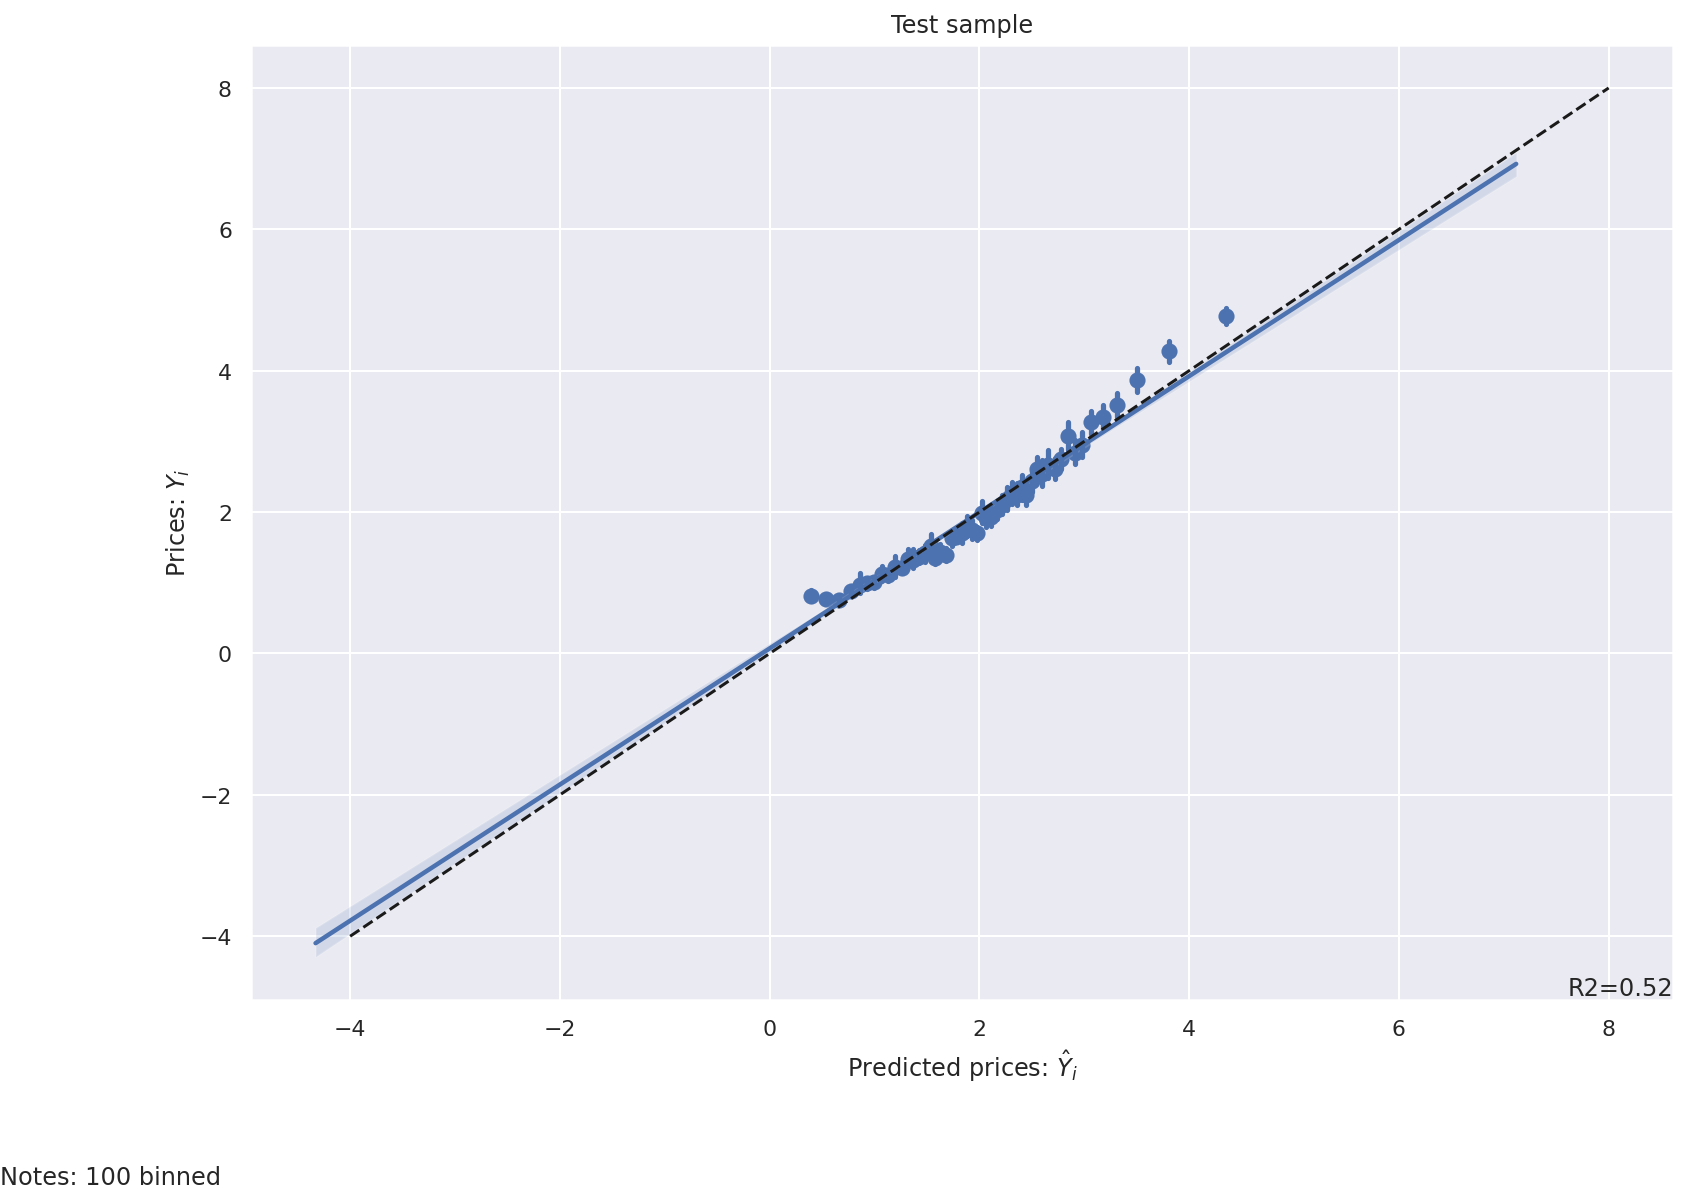

In [67]:
# report a binned regplot of the true outcome versus predictions in the test set
sns.set(rc={'figure.figsize':(11.7,8.25)})

r2=round(r2, 2)
g = regplot(x=y_test_pred, y=y_test, x_bins=50)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([-4, 8], [-4, 8], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

**How do the results change when using different predictors? Which one do you  think is the best model for this task? Explain.**

As the predictors change, we observe different results. Given the R2 and MSE scores, we observe that the best model is the regressor trained with standardized predictors including quadratics and interactions. It has the highest R2 score closer to 1 and minimum MSE score. Then, the raw predictors give good enough results. The standardized one gives the worst results.

Overall, for this problem, the last model should be chosen.